In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn. metrics import confusion_matrix, ConfusionMatrixDisplay , precision_score, recall_score, f1_score, r2_score, roc_curve, roc_auc_score, classification_report

In [ ]:
# feature_label_matrix = pd.read_csv('./labeled_feature_matrix.csv')
# display(feature_label_matrix.shape)

In [ ]:
# feature_matrix = np.loadtxt('./labeled_feature_matrix.csv', delimiter=',')
# display(feature_matrix.shape)

### Loading Data

In [37]:
# Run this cell when executing Preprocessing.v1
feature_matrix = np.load("../outputs-v1/labeled_feature_vector.npy")

In [46]:
# Run this cell when executing preprocessing.v2 with filtering
feature_matrix = np.load("../codes-v2/labeled_feature_v2.npy")

In [125]:
# Run this cell when doing feature extraction specific to features
feature_matrix = np.load("../codes-v2/labeled_feature_rest-2-all.npy")

In [23]:
# Run this cell when doing feature extraction specific to features for all subjects
feature_matrix = np.load("../all-sub-features/rest-2-all.npy")

In [32]:
# Run this cell when executing preprocessing.v2 with four class
feature_matrix = np.load("../codes-v2/labeled_feature_v3.npy")

In [6]:
# Run this cell when checking metrics for single subject
subjectid = '01'

feature_matrix = np.load(f"../codes-v2/all-feature-sub-{subjectid}.npy")

In [34]:
# Run this cell when checking metrics for test-subjects
subject_number = 'onefive'

test_features = np.load(f"../test-subjects/wavelet-sub-{subject_number}.npy")

In [3]:
# Run this cell when checking metrics for test-subjects
xTest = test_features[:, :-1]
display(xTest.shape)
for i in range(xTest.shape[0]):
        for j in range(xTest.shape[1]):
            if np.isnan(xTest[i,j]):
                  display([i,j])

(847, 130)

In [4]:
# Run this cell when checking metrics for test-subjects
yTest = test_features[:, -1]
display(yTest.shape)

(847,)

In [24]:
display(feature_matrix.shape)

(24354, 131)

In [25]:
labels = feature_matrix[:, -1]
display(labels.shape)

(24354,)

In [26]:
print((np.unique(labels)))

[0. 1.]


In [27]:
data = feature_matrix[:, :-1]
display(data.shape)
for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if np.isnan(data[i,j]):
                  display([i,j])

(24354, 130)

In [28]:
fold = StratifiedKFold(n_splits=10)

In [29]:
for train_index, test_index in fold.split(data, labels):
    x_train, x_test, y_train, y_test = [data[i] for i in train_index], [data[i] for i in test_index], [labels[i] for i in train_index], [labels[i] for i in test_index]


# x_train, x_test, y_train, y_test = train_test_split(data,labels,test_size=0.3)

In [30]:
print(len(np.unique(y_test)))

2


### Plot Confusion Matrix Function

In [31]:
def plot_cnf(cnf_matrix):
  fig = px.imshow(cnf_matrix, 
                 color_continuous_scale='Blues')

  fig.update_layout(
      title="Confusion Matrix with Rest-case-labeled: 0, One-back-labeled: 1",
      xaxis_title="Actual Labels",
      yaxis_title="Predicted Labels",
      width= 700,
      height=700,
  )

  fig.update_layout(
      font=dict(
          size=12
      ),
      xaxis = dict(
          tick0=0,
          dtick=1
      ),
      yaxis = dict(
          tick0=0,
          dtick=1
      )
  )

  for i in range(len(cnf_matrix)):
      for j in range(len(cnf_matrix)):
          
          if (cnf_matrix[i,j] >= 220):
              color = 'white'
          else: 
              color = 'black'

          fig.add_annotation(text=str(cnf_matrix[i,j]), 
                            x=j, 
                            y=i, 
                            showarrow=False,
                            font=dict(
                                color=color,
                                size=24,
                            ) 
                            )

  fig.show()

### Plot ROC Curve Function

In [32]:
def plot_roc(tpr, fpr):
  
  fig = px.line(x=fpr, 
                y=tpr,
                )
    
  fig.add_scatter(x=[0,1], 
                  y=[0,1],
                  line=dict(color='navy', dash='dash'),
                  name="Guessing"
                  )

  
  fig.update_layout(
      title='ROC Curve',
      xaxis_title='False Positive Rate',
      yaxis_title='True Positive Rate',
      width=700,
      height=500,
  )

  fig.show()

### Plot multiple ROC plots

In [12]:
# Function to plot multiple ROC curevs on single plot

def multi_roc_plot(models, x_train= x_train, y_train= y_train, x_test=x_test, y_test= y_test):
  fpr_list = [] 
  tpr_list = []
  
  legend_list = []
  
  for model in models:
    # Training the models on x_train and y_train
    model.fit(x_train, y_train)
    
    y_pred_prob = model.predict_proba(X=x_test)         # y_pred_prob.shape = [len(x-test), 2], (prob(label0), prob(label1))

    # Getting the FalsePositiveRate and TruePositveRates from plotting the ROC curve
    fpr, tpr,_ = roc_curve(
                          y_test, 
                          y_pred_prob[:,1],
                          )
    
    auc = roc_auc_score(y_test, y_pred_prob[:,1])

    tpr_list.append(tpr)
    fpr_list.append(fpr)

    index = str(model).find('(')
    legend_list.append(str(model)[:index])

  colors = px.colors.qualitative.Set1

  fig = px.line()

  for i, (tpr, fpr) in enumerate(zip(tpr_list, fpr_list)):
    fig.add_scatter(
                    x=fpr,
                    y=tpr,
                    mode='lines',
                    line=dict(color= colors[i]),
                    name= legend_list[i]
                    )
    
  fig.add_scatter(x=[0,1], 
                  y=[0,1],
                  line=dict(color='navy', dash='dash'),
                  name="Guessing"
                  )
  
  fig.update_layout(
      title='ROC Curve',
      # xaxis_title='False Positive Rate',
      # yaxis_title='True Positive Rate',
      xaxis_title=dict(text='<b>False Positive Rate</b>', font=dict(size=14)),
      yaxis_title=dict(text='<b>True Positive Rate</b>', font=dict(size=14)),
      xaxis_tickfont=dict(weight='bold'),
      yaxis_tickfont=dict(weight='bold'),
      width=700,
      height=500,
      legend=dict(
            x=1,
            y=0,
            traceorder="reversed",
            bgcolor="rgba(255, 255, 255, 0.5)",
            bordercolor="Black",
            borderwidth=2
        ),
  )

  fig.show()

In [38]:
import matplotlib.pyplot as plt

def multi_roc_plot_mpl(models, x_train= x_train, y_train= y_train, x_test=x_test, y_test= y_test):

  tprs = []
  fprs = []
  aucs = []

  fig, ax = plt.subplots()

  for i, model in enumerate(models):
    # Model predictions and ROC curve
    model.fit(x_train, y_train)
    probs = model.predict_proba(x_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, probs) 
    tprs.append(tpr)
    fprs.append(fpr)
    
    roc_auc = roc_auc_score(y_test, probs)
    aucs.append(roc_auc)
    
    ax.plot(fpr, tpr, lw=2, color=f'C{i}')

  # Remove mean TPR plot

  # Add diagonal reference line
  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')

  # Rest of code to set labels, legend, etc

  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title('ROC Curve')
  
  ax.legend(labels=[f'{str(model)}-AUC: {auc:.2f}' for auc,model in zip(aucs, models)], 
            loc='lower right',
            fontsize=10
          )
            
  fig.tight_layout()
  plt.show()

### Metrics Function

In [32]:
# Performance metrics calculation function

def metrics(model, labels, xTest=None, yTest=None):

  if np.all(xTest == None):
    # Using average of cross val score for accuracy
    score = cross_val_score(model, 
                            data, 
                            labels,
                            cv=10,
                          )
    
    cross_val_acc = np.average(score)
    cross_val_std = np.std(score)

  # # Training the model on x_train and y_train
  # model.fit(x_train, y_train)

  # if np.all(xTest == None):
  #   # Getting the class-label predictions and class-label prediction probabilities from the trained model
  #   model_predictions = model.predict(X=x_test)         # model_predictions.shape = [len(x-test)], (label(ith epoch))
  #   y_pred_prob = model.predict_proba(X=x_test)         # y_pred_prob.shape = [len(x-test), 2], (prob(label0), prob(label1))
  # else:
  #   # Getting the class-label predictions and class-label prediction probabilities for the test data
  #   model_predictions = model.predict(X=xTest)         # model_predictions.shape = [len(x-test)], (label(ith epoch))
  #   y_pred_prob = model.predict_proba(X=xTest)         # y_pred_prob.shape = [len(x-test), 2], (prob(label0), prob(label1))

  # if np.all(xTest == None):
  #   # Building the Classification Report using the predictions as a dataframe without the accuracy column
  #   classif_report = pd.DataFrame(classification_report(y_true=y_test, 
  #                                                       y_pred=model_predictions, 
  #                                                       output_dict=True,
  #                                                       zero_division=0,
  #                                                       )
  #                                 ).drop(labels="accuracy", axis=1).T.round(2)
  # else:
  #   # Building the Classification Report using the predictions as a dataframe with the accuracy column
  #   classif_report = pd.DataFrame(classification_report(y_true=yTest, 
  #                                                       y_pred=model_predictions, 
  #                                                       output_dict=True,
  #                                                       zero_division=0,
  #                                                       )
  #                                 ).T.round(2)
  # if np.all(xTest == None):  
  #   # Building the Confusion Matrix using the predicted class labels
  #   cnf_matrix = confusion_matrix(y_true=y_test, y_pred=model_predictions)
  # else:
  #   # Building the Confusion Matrix using the predicted class labels for test-subjects
  #   cnf_matrix = confusion_matrix(y_true=yTest, y_pred=model_predictions)
  
  # if len(np.unique(labels)) == 2:
  #   if np.all(xTest == None):
  #     # Getting the FalsePositiveRate and TruePositveRates from plotting the ROC curve
  #     fpr, tpr, thresholds = roc_curve(
  #                                     y_test, 
  #                                     y_pred_prob[:,1],
  #                                     #  pos_label=3
  #                                     )
  #   else:
  #     # Getting the FalsePositiveRate and TruePositveRates from plotting the ROC curve for test-subjects
  #     fpr, tpr, thresholds = roc_curve(
  #                                     yTest, 
  #                                     y_pred_prob[:,1],
  #                                     #  pos_label=3
  #                                     )

  # if len(np.unique(labels)) == 2:
  #   if np.all(xTest == None):
  #     # Calculating the Area under the ROC curve ie, AUC using class label prediction probabilities
  #     auc = roc_auc_score(y_test, y_pred_prob[:,1])
  #   else:
  #     # Calculating the Area under the ROC curve ie, AUC using class label prediction probabilities for test-subjects
  #     auc = roc_auc_score(yTest, y_pred_prob[:,1])

  # else:
  #   micro_roc_auc_ovr = roc_auc_score(
  #                                     y_test,
  #                                     y_pred_prob,
  #                                     multi_class="ovr",
  #                                     average="micro",
  #                                     )
    
  #   macro_roc_auc_ovr = roc_auc_score(
  #                                     y_test,
  #                                     y_pred_prob,
  #                                     multi_class="ovr",
  #                                     average="macro",
  #                                     )
    
  #   macro_roc_auc_ovo = roc_auc_score(
  #                                     y_test,
  #                                     y_pred_prob,
  #                                     multi_class="ovo",
  #                                     average="macro",
  #                                     )
    
  if np.all(xTest == None):  
    # print(f"Cross-val-mean-Accuracy: {100*cross_val_acc:.2f}\n Cross-val-accuarcy-std: {cross_val_std}")
    print(f"Cross-val-Accuracy: {100*cross_val_acc:.2f}+-{cross_val_std}")

  # display(classif_report)

  # plot_cnf(cnf_matrix=cnf_matrix)

  # if len(np.unique(labels)) == 2:
  #   plot_roc(tpr=tpr,
  #           fpr=fpr,
  #           )
  
  # if len(np.unique(labels)) == 2:
  #   print(f"Area Under the ROC Curve (AUC): {100*auc:.2f}")
  
  # else:
  #   print(f"\nMicro-averaged One-vs-Rest ROC AUC score:{micro_roc_auc_ovr:.2f}")
  #   print(f"\nMacro-averaged One-vs-Rest ROC AUC score:{macro_roc_auc_ovr:.2f}")
  #   print(f"\nMacro-averaged One-vs-One ROC AUC score:{macro_roc_auc_ovo:.2f}")

### Gaussian naive bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [16]:
metrics(gnb, labels)

Cross-val-mean-Accuracy: 55.92
 Cross-val-accuarcy-std: 0.03551423964768435
Cross-val-Accuracy: 55.92 +- 0.03551423964768435


### Linear Regression

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='auto')

In [18]:
metrics(lr, labels)

Cross-val-mean-Accuracy: 61.13
 Cross-val-accuarcy-std: 0.046349669419351446
Cross-val-Accuracy: 61.13 +- 0.046349669419351446


### XGB classifier

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [20]:
metrics(
        xgb, 
        labels, 
        # xTest=xTest, 
        # yTest=yTest        
        )

Cross-val-mean-Accuracy: 90.04
 Cross-val-accuarcy-std: 0.02240255979988562
Cross-val-Accuracy: 90.04 +- 0.02240255979988562


### XGB Model metric automator

In [35]:
feature_list = ["rest-2-all.npy","rest-2-psd-hjorth.npy","rest-2-psd-kurtosis.npy","rest-2-psd.npy","rest-2-wavelet-hjorth-kurtosis.npy","rest-2-wavelet-hjorth.npy","rest-2-wavelet-kurtosis.npy","rest-2-wavelet-psd-hjorth.npy","rest-2-wavelet-psd-kurtosis.npy","rest-2-wavelet-psd.npy","rest-2-wavelet.npy"]

In [31]:
for feature_file in feature_list:

    feature_matrix = np.load(f"../all-sub-features/{feature_file}")

    labels = feature_matrix[:, -1]
    data = feature_matrix[:, :-1]

    print(f"Shape of {feature_file}:")
    print(data.shape)


    for train_index, test_index in fold.split(data, labels):

        x_train, x_test, y_train, y_test = data[train_index], data[test_index], labels[train_index], labels[test_index]

    from xgboost import XGBClassifier
    xgb = XGBClassifier()

    metrics(xgb, labels)


Shape of rest-2-all.npy:
(24354, 130)
Cross-val-mean-Accuracy: 90.04
 Cross-val-accuarcy-std: 0.02240255979988562
Cross-val-Accuracy: 90.04+-0.02240255979988562
Shape of rest-2-psd-hjorth.npy:
(24354, 31)
Cross-val-mean-Accuracy: 61.71
 Cross-val-accuarcy-std: 0.030591473609885417
Cross-val-Accuracy: 61.71+-0.030591473609885417
Shape of rest-2-psd-kurtosis.npy:
(24354, 29)
Cross-val-mean-Accuracy: 59.38
 Cross-val-accuarcy-std: 0.038326909564744736
Cross-val-Accuracy: 59.38+-0.038326909564744736
Shape of rest-2-psd.npy:
(24354, 28)
Cross-val-mean-Accuracy: 58.19
 Cross-val-accuarcy-std: 0.038042673325462066
Cross-val-Accuracy: 58.19+-0.038042673325462066
Shape of rest-2-wavelet-hjorth-kurtosis.npy:
(24354, 102)
Cross-val-mean-Accuracy: 90.68
 Cross-val-accuarcy-std: 0.025644296399857037
Cross-val-Accuracy: 90.68+-0.025644296399857037
Shape of rest-2-wavelet-hjorth.npy:
(24354, 101)
Cross-val-mean-Accuracy: 90.59
 Cross-val-accuarcy-std: 0.025007000491606358
Cross-val-Accuracy: 90.59+-0

### ETC 

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50)

In [22]:
metrics(etc, labels)

Cross-val-mean-Accuracy: 87.75
 Cross-val-accuarcy-std: 0.03414863363422874
Cross-val-Accuracy: 87.75 +- 0.03414863363422874


### ETC model metrics automator

In [33]:
for feature_file in feature_list:

    feature_matrix = np.load(f"../all-sub-features/{feature_file}")

    labels = feature_matrix[:, -1]
    data = feature_matrix[:, :-1]

    print(f"\n{feature_file}:\n")
    # print(data.shape)


    for train_index, test_index in fold.split(data, labels):

        x_train, x_test, y_train, y_test = data[train_index], data[test_index], labels[train_index], labels[test_index]

    from sklearn.ensemble import ExtraTreesClassifier
    etc = ExtraTreesClassifier(n_estimators=50)

    metrics(etc, labels)


rest-2-all.npy:

Cross-val-Accuracy: 87.60+-0.0328834781131172

rest-2-psd-hjorth.npy:

Cross-val-Accuracy: 56.94+-0.01797708549641622

rest-2-psd-kurtosis.npy:

Cross-val-Accuracy: 50.82+-0.013259902382050326

rest-2-psd.npy:

Cross-val-Accuracy: 50.32+-0.0001358822563801429

rest-2-wavelet-hjorth-kurtosis.npy:

Cross-val-Accuracy: 88.15+-0.03374514829956793

rest-2-wavelet-hjorth.npy:

Cross-val-Accuracy: 88.47+-0.03300938277715663

rest-2-wavelet-kurtosis.npy:

Cross-val-Accuracy: 88.08+-0.03388139292581112

rest-2-wavelet-psd-hjorth.npy:

Cross-val-Accuracy: 87.56+-0.035155164991458696

rest-2-wavelet-psd-kurtosis.npy:

Cross-val-Accuracy: 88.22+-0.03133520671922815

rest-2-wavelet-psd.npy:

Cross-val-Accuracy: 88.01+-0.031734995575267544

rest-2-wavelet.npy:

Cross-val-Accuracy: 88.56+-0.03171512346877833


### RFC

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)

In [24]:
metrics(rfc, labels)

Cross-val-mean-Accuracy: 88.17
 Cross-val-accuarcy-std: 0.04324445370699982
Cross-val-Accuracy: 88.17 +- 0.04324445370699982


### RFC model metrics automator


In [36]:
for feature_file in feature_list:

    feature_matrix = np.load(f"../all-sub-features/{feature_file}")

    labels = feature_matrix[:, -1]
    data = feature_matrix[:, :-1]

    print(f"\n{feature_file}:\n")


    for train_index, test_index in fold.split(data, labels):

        x_train, x_test, y_train, y_test = data[train_index], data[test_index], labels[train_index], labels[test_index]

    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=50)

    metrics(rfc, labels)


rest-2-wavelet-psd-hjorth.npy:

Cross-val-Accuracy: 87.84+-0.040936768662707054

rest-2-wavelet-psd-kurtosis.npy:

Cross-val-Accuracy: 87.19+-0.0415716748625791

rest-2-wavelet-psd.npy:

Cross-val-Accuracy: 81.61+-0.041393370287766136

rest-2-wavelet.npy:

Cross-val-Accuracy: 83.64+-0.04217680829275982


In [73]:
models = [xgb, etc, rfc]
str_list = []
for model in models:
  index = str(model).find('(')
  str_list.append(str(model)[:index])

display(",".join(str_list))
# display(str([0][:]))

'XGBClassifier,ExtraTreesClassifier,RandomForestClassifier'

### XGB,ETC,RFC multi-roc plot

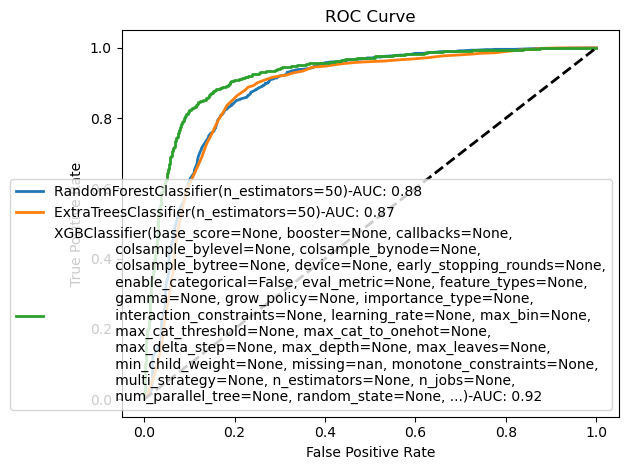

In [37]:
multi_roc_plot_mpl([rfc, etc, xgb])

### SVC

In [25]:
from sklearn.svm import SVC
svc = SVC(gamma='auto',
          probability=True,
          )

In [26]:
metrics(svc, labels)

Cross-val-mean-Accuracy: 55.05
 Cross-val-accuarcy-std: 0.03843680668315772
Cross-val-Accuracy: 55.05 +- 0.03843680668315772


### KNN 

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=27)

In [28]:
metrics(knn, labels)

Cross-val-mean-Accuracy: 58.57
 Cross-val-accuarcy-std: 0.01848597810260746
Cross-val-Accuracy: 58.57 +- 0.01848597810260746
